# Statistics basics
## Final project
Good news! You are hired by some retail company to analyse transaction statistics in a retail chain. (Sorry, this is just an imaginary company so far, but if you successfully finish our program, I'm sure it will become reality.)

You have to use everything that we learned so far to answer questions that are asked by your employer.

Part of the questions require that you write some code that will be automatically tested with autograding. So when you are finished, please, send this work to automatic grading.

The other part of questions are presented in the appropriate quiz. Answer them using your results.

Finally, some problems will be assessed manually. So, please, submit your notebook to staff graded assignment as well.

Note you are not allowed to use loops anywhere in this project!

Let's begin!

### Data

There are three datasets: `customers.csv`, `purchases.csv` and `shops.csv`. They are stored in `data` folder.

`customers.csv` contains information about each customer registered in loyalty program.

`shops.csv` contains information about shops and special offers they organized. One shap can organize several offers and therefore there are usually several rows that correspond to the same shops. However, some shops do not organize special offers at all, but they are presented in this table nevertheless.

`purchases.csv` is a purchase log. It contains information for all customers, either registered in a loyalty program (in this case we know the corresponding customer id) or not registered. One purchase can be a collection of several items, but we see only the total price of everything bought.

First, let us load these datasets and make a quick glance on them.

### Problem 1 (autograded)
Load datasets intro variables `customers`, `purchases` and `shops`. Use `pd.read_csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [2]:
customers = pd.read_csv('customers.csv')  
purchases = pd.read_csv('purchases.csv')  
shops = pd.read_csv('shops.csv')  

In [3]:
customers.head()

,customer id,age
0,1149,71.0
1,750,21.0
2,428,36.0
3,360,38.0
4,816,51.0


In [4]:
purchases.head()

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038


In [5]:
shops.head()

,shop_id,offer_begin,offer_end
0,0,2019-02-28,2019-03-13
1,0,2018-07-22,2018-08-10
2,0,2018-09-21,2018-09-27
3,1,NaN,NaN
4,2,NaN,NaN


### Problem 2 (quiz)

Investigate dataframes and answer the following questions (in the appropriate Quiz):

1. What is the type of variable `customer_id` in the dataset `purchases`?
2. What is the type of variable `age` in the dataset `customers`?

Note that you have to provide your answers based on the meaning of the data, not on the Python object types of the corresponding column.

1. What is the type of variable `customer_id` in the dataset `purchases`?

We have numeric values, but we can't compare them, i.e. comparing the id of one client cannot be compared with the id of another client, this will not give us any information.

The answers is **categorical**.

2. What is the type of variable `age` in the dataset `customers`?

Here we have numeric values that can be compared, i.e. we can tell which customer is older or younger, etc.

The answers is **numerical**. 

### Problem 3 (SGA)
Let us consider column `total_price` in the dataset `purchases`. May we assume that this column is an i.i.d. sample from some random variable? Write your answer and full explanation in the cell below.


Let us recall the **definition of i.i.d**.

We know that a collection of random variables is independent and identically distributed if each random variable has the same probability distribution as the others and all are mutually independent.

**Identically Distributed**: there are no overall trends–the distribution doesn’t fluctuate and all items in the sample are taken from the same probability distribution.    

**Independent**: the sample items are all independent events. In other words, they aren’t connected to each other in any way. In other words, knowledge of the value of one variable gives no information about the value of the other and vice versa.


Thus, we can say:

**independence**:
     For sample independence, all values must be independent of each other. Here we can see that the records for the same customer can be repeated several times. Moreover, records of the same customer in the same store can be repeated. Even though the values for each record are different (total value), obviously there will be a dependency. And since there is a dependency in the data for one client, the entire sample can no longer be independent. Property failed.
      
**identically distributed**:
      Since each person is different (income, consumer needs, frequency of shopping), the distribution in the general sample will fluctuate, since the values are not selected from the same probability distribution. Property failed.


Thus, the sample formed in this way is **not i.i.d**.

### Problem 4 (quiz)
Visualise distribution of variable `age` in the dataset `customers` using appropriate visualization tool.


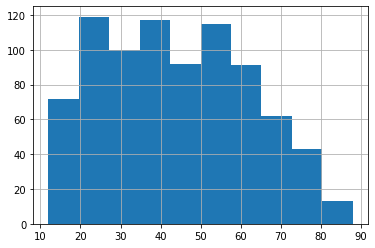

In [6]:
# your code here
customers['age'].hist();

### Problem 5 (quiz)
Your employer is going to provide two special offers for all registered customers based on the customer age. They want to pick some threshold age, and offer one special program to customers who are younger than this threshold age and another special program to customers who are older than this age. They want to choose the threshold in such a way that the number of potential participants of both programs coincide (or at least be as close to each other as possible). What is the threshold?

In [7]:
# your code here
threshold_age = customers['age'].median()
threshold_age 

43.0

### Problem 6 (quiz)

Let us visualize how purchases are distributed around a year. For example, it is known that December is a hot month for retail due to Christmas. Will you see it in the data? Are there any other tendencies we will see?

To do it, we have to extract a month from the `date` variable of `purchases` table and create a new variable (new dataframe column) that contains this month, then plot distribution of this variable. There is a special data type in pandas to represent date and time. However, by default `pd.read_csv` does not try to guess that a particular column contains something that looks like a date and reads it just as a column of strings. So let's convert this column manually using function `pd.to_datetime` first:


In [8]:
purchases['date'] = pd.to_datetime(purchases['date'])

Let's check that `date` has correct `dtype`:

In [9]:
purchases['date'].dtype

dtype('<M8[ns]')

This should return something like `dtype('datetime64[ns]')` or `dtype('<M8[ns]')`. It is much easier to work with dates when they are converted to native datetime format instead of strings. For example, you can find the difference between two dates and do a lot of other things. To extract different features of date like month of even day of week, one can use `.dt` accessor (similar to using `.str` accessor to access string methods), see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) for details. For example, this is how we can extract day of week (Monday=0, Sunday=6):

In [10]:
purchases['date'].dt.dayofweek

0        4
1        5
2        6
3        5
4        5
        ..
40397    5
40398    5
40399    2
40400    5
40401    5
Name: date, Length: 40402, dtype: int64

Now let us return to our problem here. We want to make a plot that shows how many purchases we have per month. In other words, we want to create and consider new variable `month`. This is a categorical variable. Use an appropriate tool to visualize it.

Make this bar plot. 

**Hint.** To sort the values on the horizontal axis one can use `.sort_index()`.


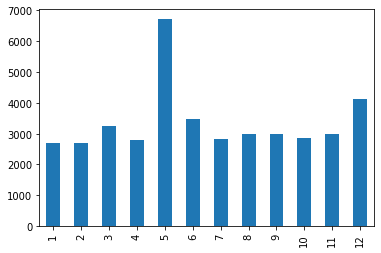

In [11]:
# YOUR CODE HERE
purchases['month'] = purchases['date'].dt.month
purchases['month'].value_counts().sort_index().plot(kind='bar');

In [12]:
purchases['month'].value_counts().sort_index()

1     2688
2     2710
3     3252
4     2790
5     6717
6     3473
7     2817
8     3000
9     2987
10    2863
11    2991
12    4114
Name: month, dtype: int64

### Problem 7 (SGA)

What's wrong with May? Why do we have so many purchases? Are there any unknown holidays in this month? Or it's some other reason? Investigate your data and give an answer. Write it in the cell below. Add new cells to include code / explanations as necessary.

We should to explain why there were so many purchases in May. **An assumption is made about the presence of holidays and a large number of days off**. But we don't know which country these statistics are for, so we can't find a calendar of holidays and weekends. Thus, **this assumption does not hold**.

Let's take a closer look at the available data. Consider the first 10 rows of the purchases table. As we can see, in the date line **we have data for both 2018 and 2019**. Let's define exactly the period for which we are provided with purchase data.

In [13]:
purchases.iloc[0:10]

,customer_id,date,shop_id,total_price,month
0,0.0,2018-05-04,40,289.673291,5
1,0.0,2019-01-26,40,1316.898901,1
2,0.0,2018-11-18,42,159.414367,11
3,0.0,2018-05-12,42,808.791649,5
4,0.0,2019-04-20,42,1207.855038,4
5,0.0,2018-11-24,42,1057.752024,11
6,0.0,2018-07-28,15,896.895694,7
7,0.0,2019-06-01,40,341.922336,6
8,0.0,2019-03-13,42,69.240631,3
9,0.0,2018-12-22,40,936.012095,12


In [14]:
# start
sorted(purchases['date'].dt.strftime('20%y-%m-%d').unique())[0:15]

['2018-05-03',
 '2018-05-04',
 '2018-05-05',
 '2018-05-06',
 '2018-05-07',
 '2018-05-08',
 '2018-05-09',
 '2018-05-10',
 '2018-05-11',
 '2018-05-12',
 '2018-05-13',
 '2018-05-15',
 '2018-05-16',
 '2018-05-17',
 '2018-05-18']

In [15]:
# end
sorted(purchases['date'].dt.strftime('20%y-%m-%d').unique())[-15:] 

['2019-05-20',
 '2019-05-21',
 '2019-05-22',
 '2019-05-23',
 '2019-05-24',
 '2019-05-25',
 '2019-05-26',
 '2019-05-27',
 '2019-05-28',
 '2019-05-29',
 '2019-05-30',
 '2019-05-31',
 '2019-06-01',
 '2019-06-02',
 '2019-06-03']

So, we have data for the period **from 2018-05-03 to 2019-06-03**. As we can see, we have **data for May and June for two years**. And if the data for June 2019 is presented only in the amount of 3 days and in the total standings will not have a sufficiently large effect, then **the data for May are presented in large numbers. Thus, we count the data for May twice**. And in the presented histogram, we see the resulting effect, which is not related to the number of promotions, holidays, days off, but by the fact that the data for May were counted twice.

**Conclusions**:
- if we want to draw correct conclusions from the available data, then we need to adjust the dates from May 2018 to April 2019 inclusive.
- without adjusting the data, due to the fact that the data for May was counted twice, we cannot compare these data with other months.
- without adjusting the data, all assumptions about the impact of the presence of discounts, holidays, etc. incorrect.
- in case of data adjustment, you can additionally investigate the number of promotions by months and their impact on the number of purchases, you can also consider the total number of promotional days, since the promotion can last one day, or maybe a month, and the effect will naturally be different.

Below is a histogram of adjusted data (i.e. for the period from 2018-05 to 2019-04 inclusive).

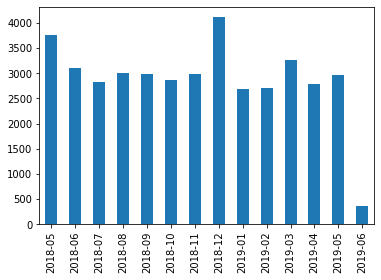

In [16]:
year_month = purchases['date'].dt.strftime('20%y-%m')
year_month.value_counts().sort_index().plot(kind='bar');

In [17]:
data_monts_purchases = year_month.value_counts().sort_index()[:-1]#.to_list()[:-1]
dict_new = data_monts_purchases.to_dict()
#dict_new
df_new = pd.DataFrame.from_dict(dict_new, orient='index', columns=['numbers']).reset_index()
df_new.insert(0,'n',range(0,len(df_new)))
df_new

,n,index,numbers
0,0,2018-05,3756
1,1,2018-06,3102
2,2,2018-07,2817
3,3,2018-08,3000
4,4,2018-09,2987
5,5,2018-10,2863
6,6,2018-11,2991
7,7,2018-12,4114
8,8,2019-01,2688
9,9,2019-02,2710


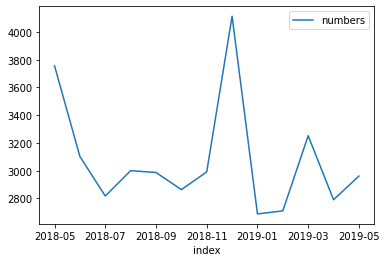

In [18]:
df_new.plot(x='index',y='numbers');

As we can see from the histogram of the adjusted data, there is no longer such a double effect of the increased data for the month of May. **However, we can still see that May (with the exception of December) has the highest number of purchases**. We can research the number of  promotions here.

In [19]:
shops2 = shops.dropna().copy()
shops2['offer_begin'] = pd.to_datetime(shops2.offer_begin, format='%Y-%m-%d')
shops2['offer_end'] = pd.to_datetime(shops2.offer_end, format='%Y-%m-%d')
shops2['offer_begin'] = shops2['offer_begin'].dt.strftime('20%y-%m')
shops2['offer_end'] = shops2['offer_end'].dt.strftime('20%y-%m')

In [20]:
# YOUR CODE HERE
def get_action_months(df):
    start, end = df['offer_begin'], df['offer_end']
    if start != end:
        df['action_months'] = [start, end]
    else:
        df['action_months'] = [start]
    return df

shops2 = shops2.apply(get_action_months, axis=1)

flatten_list = list(np.concatenate(list(shops2['action_months'].values)).flat)

result_dict = dict([(i, flatten_list.count(i)) for i in set(flatten_list)])
sorted_dict = dict(sorted(result_dict.items())) 
sorted_dict

{'2018-05': 12,
 '2018-06': 23,
 '2018-07': 25,
 '2018-08': 29,
 '2018-09': 24,
 '2018-10': 9,
 '2018-11': 10,
 '2018-12': 40,
 '2019-01': 36,
 '2019-02': 13,
 '2019-03': 16,
 '2019-04': 19,
 '2019-05': 27,
 '2019-06': 13}

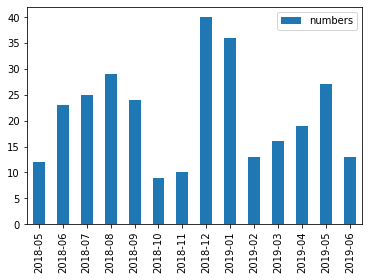

In [21]:
actions = pd.DataFrame.from_dict(sorted_dict, orient='index', columns=['numbers'])
actions.sort_index().plot(kind="bar");

YOUR ANSWER HERE

As can be seen from the indicated histogram, our assumption was confirmed. We can see that the number of shares in May 2018 was not the highest. In this case, it is necessary to check the influence of the number of promotional days in each month.

In [22]:
shops3 = shops.dropna().copy()

def action_day_range(df):
    start, end = df['offer_begin'], df['offer_end']
    df['action_day_range'] = pd.date_range(start, end)
    return df

shops3 = shops3.apply(action_day_range, axis=1)

list_action_day_range = []
for i in shops3['action_day_range']:
    for ii in i:
        list_action_day_range.append(ii.strftime('%Y-%m-%d'))
    
list_action_month = [i[:-3] for i in list_action_day_range]

result_dict2 = dict([(i, list_action_month.count(i)) for i in set(list_action_month)])
sorted_dict2 = dict(sorted(result_dict2.items())) 
sorted_dict2

{'2018-05': 166,
 '2018-06': 271,
 '2018-07': 324,
 '2018-08': 269,
 '2018-09': 316,
 '2018-10': 114,
 '2018-11': 159,
 '2018-12': 623,
 '2019-01': 400,
 '2019-02': 190,
 '2019-03': 154,
 '2019-04': 255,
 '2019-05': 356,
 '2019-06': 164}

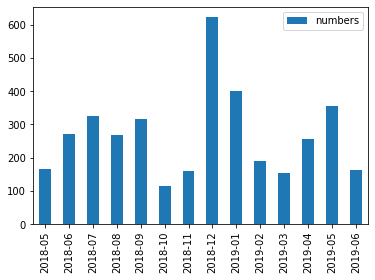

In [23]:
actions_month = pd.DataFrame.from_dict(sorted_dict2, orient='index', columns=['numbers'])
actions_month.sort_index().plot(kind="bar");

How we can see the total number of promotional days is also not the largest for May 2018 (for May 2019 also).

**According to the available data, we don't like to justify why there were so many purchases in May 2018 (adjusted). There are probably other factors influencing the situation**, such as the amount of discounts, the economic situation, etc.

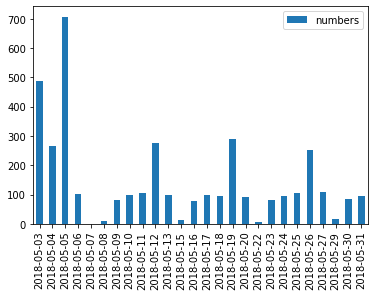

In [24]:
purchases_date = []
for i in purchases['date']:
    ii = i.strftime('%Y-%m-%d')
    if '2018-05' in ii:
        purchases_date.append(ii)
        
result_dict3 = dict([(i, purchases_date.count(i)) for i in set(purchases_date)])
sorted_dict3 = dict(sorted(result_dict3.items())) 

may_2018 = pd.DataFrame.from_dict(sorted_dict3, orient='index', columns=['numbers'])
may_2018.sort_index().plot(kind='bar');

In [25]:
may_3_5 = purchases.loc[(purchases['date'] == '2018-05-03') ^ (purchases['date'] == '2018-05-05')]
may_3_5

,customer_id,date,shop_id,total_price,month
42,2.0,2018-05-05,51,484.562929,5
68,3.0,2018-05-03,16,192.785472,5
88,4.0,2018-05-03,53,221.005981,5
132,7.0,2018-05-05,38,148.185101,5
186,10.0,2018-05-03,27,142.486023,5
...,...,...,...,...,...
40244,NaN,2018-05-05,36,145.558632,5
40301,NaN,2018-05-05,34,453.599939,5
40357,NaN,2018-05-05,47,0.000000,5
40361,NaN,2018-05-03,47,53.580163,5


In [26]:
may_3_5.groupby(['date']).count()

,customer_id,shop_id,total_price,month
date,,,,
2018-05-03,349,489,489,489
2018-05-05,498,707,707,707


In [27]:
may_3_5.groupby(['date']).size().reset_index(name='counts')

,date,counts
0,2018-05-03,489
1,2018-05-05,707


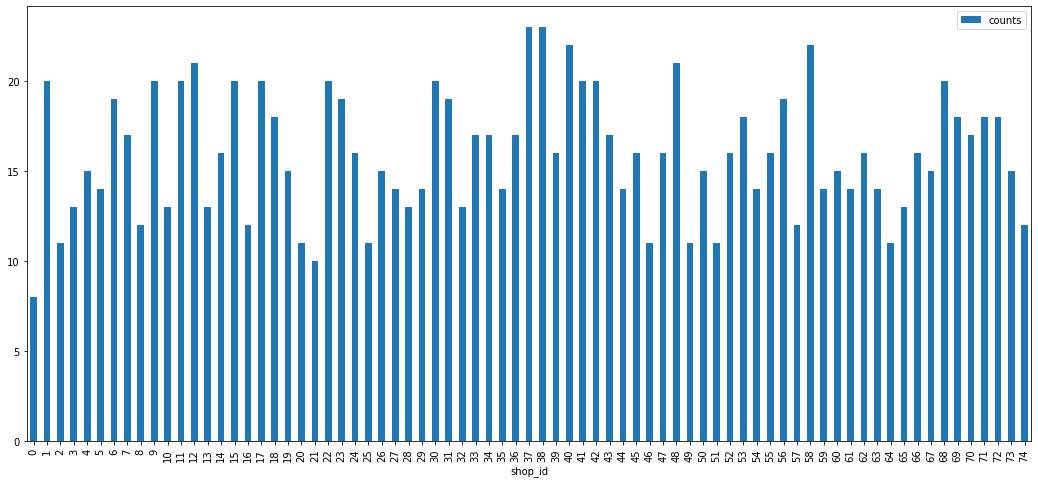

In [28]:
may_3_5_shop_id = may_3_5.groupby(['shop_id']).size().reset_index(name='counts')
# may_3_5_shop_id
ax = may_3_5_shop_id.plot.bar(x='shop_id', y='counts',  figsize=(18,8))

**No specific shops frequency was found.**

In [29]:
list_dupl = list(may_3_5.duplicated(subset=['date', 'shop_id', 'total_price']))
result = dict([(i, list_dupl.count(i)) for i in set(list_dupl)])
result = dict(sorted(result.items())) 
result

{False: 1196}

**No duplicates in records.**

In [30]:
len(may_3_5) - len(may_3_5.dropna())

349

**349 unknown customers, but no duplicates.**

Let us check two mays.

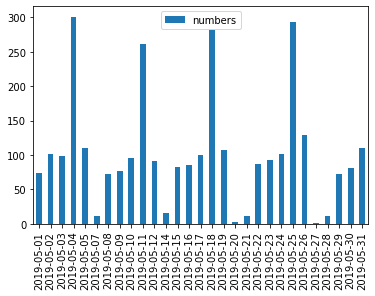

In [31]:
purchases_date2 = []
for i in purchases['date']:
    ii = i.strftime('%Y-%m-%d')
    if '2019-05' in ii:
        purchases_date2.append(ii)
    # purchases_date_all.append(i.strftime('%Y-%m-%d'))

#sorted(purchases_date2)

result_dict3_ = dict([(i, purchases_date2.count(i)) for i in set(purchases_date2)])
sorted_dict3_ = dict(sorted(result_dict3_.items())) 
#sorted_dict3

may_2019 = pd.DataFrame.from_dict(sorted_dict3_, orient='index', columns=['numbers'])
may_2019.sort_index().plot(kind='bar');

Let us compare two monts.

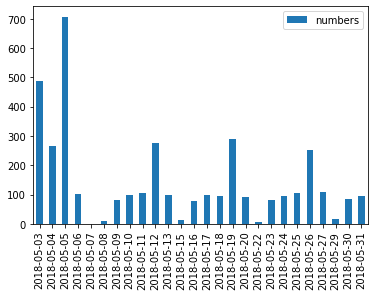

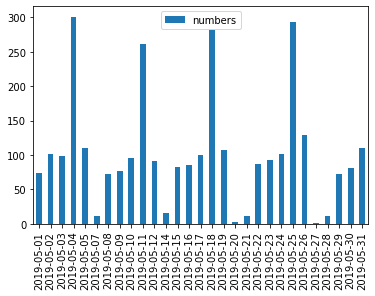

In [32]:
ax1 = may_2018.sort_index().plot(kind='bar')
ax2 = may_2019.sort_index().plot(kind='bar');

**Outcome**

- In May, the largest number of purchases was recorded. The check showed that the data for May was counted twice, that is, we see the total number of purchases for May 2018 and May 2019.

- When looking at the data, where May and June are separated by year, we can all observe the largest number of purchases in May 2018 (not counting December).

- Checking the number of promotions and promotional days did not show that these indicators were the highest in May 2018.

- Checking May 2018 for duplicates did not lead to a result. There are 349 records in the table with buyers without ID , but duplicates (no ID was found).

- Further research showed that in May 2018, the most purchases were recorded on May 3 and 5. But the reasons for this, given the available data, are unclear.

- Comparison of data for two May 2018 and 2019 showed the presence of the same peak activity of buyers on approximately the same days. The study showed that it is a weekend (Saturday).

**Total**
- the maximum number of purchases in May there are data presentation errors (total data for two months).
- the maximum number of purchases in May 2018 is not explained by the available data.


**Assumptions**

The following factors could influence the increased demand for buying activity:
- size of discounts (hyper-sales)
- economic and social situation (closing of stores due to sanctions, reopening of stores after a pandemic, the announcement of the coming end of the world, the expectation of a shortage of goods, etc.

### Problem 8 (quiz)
We see that people go to shop more often in December. But do they spend more per each visit? Let us draw a bar plot that shows the average purchase total price per month of year. Use `groupby` with the `month` variable you (hopefully) created earlier.

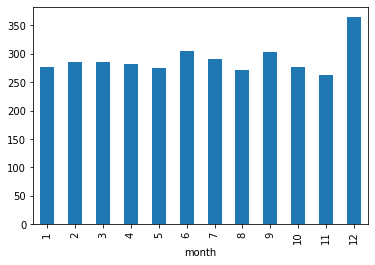

In [33]:
# your code here
purchases.groupby('month')['total_price'].agg('mean').plot(kind='bar');

### Problem 9 (quiz)
Okay, we see that there is a difference between December's mean purchase price and other month's. But we also see that the average price is different in different months (not including December), probably due to some random factors. Is it possible that December behaviour is just a result of fluke? To answer this question, let us compare two months, for example, December and November, in a statistically rigorous way.

To do so, let us find the average purchase price in each month in each shop (hint: use `.pivot_table`), then extract two samples: one contains average purchase prices in December and another in November. The number of elements in each sample should be equal to the number of shops. Is it true that they are different? Use the statistical test that suits this problem the best with a two-sided alternative. Then answer the question in a quiz.


In [34]:
# your code here
table = pd.pivot_table(purchases, values='total_price', index=['shop_id'],
                       columns=['month'], aggfunc=np.mean)
# table

november = table[11].values
december = table[12].values

stats.ttest_rel(november, december)

Ttest_relResult(statistic=-12.130046456676514, pvalue=2.8875117936923646e-19)

### Problem 10 (autograded)

Now let us investigate customer behaviour. First of all we are interested in the relation between customers' age and their spendings per each purchase. To study this relation, first join tables `purchases` and `customers` in such a way to obtain information on customer's age for each purchase. Call the resulting table `purchases_c`. This table should contain all purchases by the registered customers, but rows that correspond to unregistered customers (not present in `customers`) should be dropped. The resulting table also should contain column `customer_id`.

In [35]:
# YOUR CODE HERE
purchases_c = pd.merge(purchases, customers, how='left', left_on=['customer_id'], right_on=['customer id'])
purchases_c = purchases_c[purchases_c['customer_id'].notna()]

In [36]:
assert (
    purchases_c[lambda x: x["customer_id"] == 123]["age"]
    == customers.set_index("customer id").loc[123]["age"]
).all()
assert (
    purchases_c[lambda x: x["customer_id"] == 12]["age"]
    == customers.set_index("customer id").loc[12]["age"]
).all()
assert sum(purchases_c["customer_id"]) == 17548008.0

### Problem 11 (autograded)

In [37]:
purchases_c

,customer_id,date,shop_id,total_price,month,customer id,age
0,0.0,2018-05-04,40,289.673291,5,0.0,38.0
1,0.0,2019-01-26,40,1316.898901,1,0.0,38.0
2,0.0,2018-11-18,42,159.414367,11,0.0,38.0
3,0.0,2018-05-12,42,808.791649,5,0.0,38.0
4,0.0,2019-04-20,42,1207.855038,4,0.0,38.0
...,...,...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,11,1212.0,24.0
28795,1212.0,2018-07-20,60,50.592132,7,1212.0,24.0
28796,1212.0,2019-04-18,15,95.459705,4,1212.0,24.0
28797,1212.0,2019-02-14,60,69.968788,2,1212.0,24.0


To visualize the relation between customer's age and their spendings, we have to transform our table in such a way that one observation (row) corresponds to one customer. Let us do it by groupping and aggregating. Transform table `purchases_c` to find average `total_price` for each customer and keep column `age`. Indexes of the new dataframe should be customer id's. Put the resulting dataframe to variable `purchases_c_mean`.


In [38]:
purchases_c_mean = purchases_c.groupby(['customer_id', 'age'])['total_price'].apply(np.mean).reset_index(level=1)

In [39]:
assert (
    purchases_c_mean.loc[12]["total_price"]
    == purchases_c.query("customer_id == 12")["total_price"].mean()
)
assert (
    purchases_c_mean.loc[125]["total_price"]
    == purchases_c.query("customer_id == 125")["total_price"].mean()
)

### Problem 12 (quiz)
Use dataframe `purchases_c_mean` to visualize the relation between customer's `age` (horizontal axis) and their average `total_price` (vertical axis).

<AxesSubplot:xlabel='age', ylabel='total_price'>

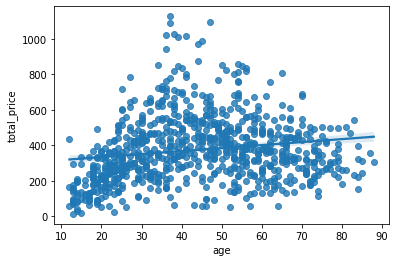

In [40]:
# YOUR CODE HERE
df = purchases_c_mean
sns.regplot(x=df['age'], y=df['total_price'])

### Problem 13 (quiz)
Find Pearson's correlation coefficient between age and total price.

In [41]:
# YOUR CODE HERE
pearsoncorr = purchases_c_mean.corr(method='pearson')
pearsoncorr

,age,total_price
age,1.000000,0.165395
total_price,0.165395,1.000000


### Problem 14 (quiz)
We found correlation in the data present on the previous step and made some conclusions based on this data. However, we have to make sure that we can generalize our conclusion to the corresponding population. To do it, let us perform a statistical test of the significance of correlation. This can be done with `scipy.stats.pearsonr`. However, our data contains `NaN`'s in column `age` (there are registered customers with unknown age). Use method `.dropna()` to remove such rows from the dataset, then perform statistical testing with `pearsonr`. This function returns a two-tuple: first value is correlation coefficient and the second is p-value that corresponds to a test where the null hypothesis is that the correlation in population is zero.

In [42]:
# YOUR CODE HERE
purchases_c_mean_new = purchases_c_mean.dropna(subset=['age'])
#pearsoncorr = purchases_c_mean.corr(method='pearson')
#pearsoncorr
pearson_coeff = stats.pearsonr(purchases_c_mean_new['age'], purchases_c_mean_new['total_price'])
pearson_coeff

(0.16539508120771906, 1.8110789103306339e-06)

### Problem 15 (autograded)
Now we are going to do the main investigation. We want to understand how special offers in our shops affect customers' behaviour. To do it, we have to identify those purchases that are made during special offers. This can be a bit tricky: for each purchase we know its date and shop id. For each shop we also know the dates of all special offers (there can be several). So for each purchase we have to compare its date with dates of all offers that took place in the corresponding shop.

As a first step, let us try to join `purchases_c` with `shops`. Name this table `full_df_preliminary`.

In [43]:
# YOUR CODE HERE
full_df_preliminary = pd.merge(purchases_c, shops, how="left")

In [44]:
assert (
    full_df_preliminary.query('date == "2019-04-24" and customer_id == 555.0')[
        "offer_begin"
    ].iloc[0]
    == "2018-08-15"
)
assert (
    full_df_preliminary.query('date == "2018-08-24" and customer_id == 686.0').max()[
        "offer_end"
    ]
    == "2019-01-21"
)

### Problem 16 (autograded)
Let us investigate the table `full_df_preliminary`. Each row of this table corresponds to some purchase. However, for some shops we have several special offers and therefore several rows in the table `shops`. During the join each purchase is joined to all rows of `shops` that correspond to a particular shop. Therefore, purchases are duplicated, and we lost information on which rows in `full_df_preliminary` correspond to which purchase. (For example, the last two rows seem to correspond to the same purchase, but can we be sure?) This is due to the fact that table `purchases_c` don't have any explicit column with purchase identifier. Let us add it. As each row of `purchases_c` corresponds to exactly one purchase, table index can work as such an identifier. To create a column that coincides with the index one can use method `.reset_index()`.

Apply `.reset_index()` to `purchases_c`, then repeat the join from the previous problem. Name the resulting dataframe `full_df`.

In [45]:
# YOUR CODE HERE
purchases_c_new = purchases_c.reset_index()
full_df = pd.merge(purchases_c_new, shops, how="left")

In [46]:
assert (
    full_df.query("index == 1207")
    .iloc[0][["customer_id", "date", "shop_id", "total_price"]]
    .equals(purchases_c.loc[1207][["customer_id", "date", "shop_id", "total_price"]])
)

### Problem 17 (autograded)
Now we need to check for each purchase, did it happen during any of the special offers or not. In the dataset `full_df`, each row relates some purchase with some special offer that happened in the same shop as a purchase. Let us check, is it true that this purchase happened during the corresponding offer? Add a column `offer` that contains values `True` or `False` that answer this question. To do so, we have to compare the value in column `date` with values in columns `offer_begin` and `offer_end`. Let us assume that `offer_end` is the last day of the offer (so the offer still holds during this day). Name the corresponding dataframe `full_df_offer`. Note that you can compare between dates, but not between dates and strings. Convert your data appropriately.


In [47]:
# YOUR CODE HERE
full_df["offer_begin"] = pd.to_datetime(full_df.offer_begin, format='%Y-%m-%d')
full_df["offer_end"] = pd.to_datetime(full_df.offer_end, format='%Y-%m-%d')

def is_purchase_in_offer(df):
    start, end, purchase_date = df['offer_begin'], df['offer_end'], df['date']
    
    if start <= purchase_date <= end:
        df['offer'] = True
    else:
        df['offer'] = False
        
    return df


full_df_offer = full_df.apply(is_purchase_in_offer, axis=1)



In [48]:
from itertools import islice

for _, row in islice(full_df_offer.iterrows(), 0, 1000):
    assert (
        (pd.to_datetime(row["date"]) >= pd.to_datetime(row["offer_begin"]))
        & (pd.to_datetime(row["date"]) <= pd.to_datetime(row["offer_end"]))
    ) == row["offer"]

### Almost here
Now we have a table that contains information on whether a particular purchase happened during a particular special offer. What we need is a new table that contains information on whether a particular purchase happened during *any* relevant special offer. This can be done by grouping and aggregating. Basically, we need to group our table by column `index` that contains a purchase identifier and apply a special aggregation function `any` to column `offer`. This function checks if there is any `True` element in a group and returns `True` in this case, otherwise (everything is `False`) it returns false. Also, we have to keep all other columns that are related to purchases as is. They are duplicated in the group, so we can just get the first value. This is done by the aggregation function `first`. To apply these functions to different columns, we have to pass a dictionary to method `.agg`. Let's see what's happening.


In [49]:
purchases_offer = full_df_offer.groupby("index").agg(
    {
        "customer_id": "first",
        "date": "first",
        "shop_id": "first",
        "total_price": "first",
        "month": "first",
        "age": "first",
        "offer": "any",
    }
)
purchases_offer

,customer_id,date,shop_id,total_price,month,age,offer
index,,,,,,,
0,0.0,2018-05-04,40,289.673291,5,38.0,False
1,0.0,2019-01-26,40,1316.898901,1,38.0,False
2,0.0,2018-11-18,42,159.414367,11,38.0,False
3,0.0,2018-05-12,42,808.791649,5,38.0,False
4,0.0,2019-04-20,42,1207.855038,4,38.0,False
...,...,...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,11,24.0,False
28795,1212.0,2018-07-20,60,50.592132,7,24.0,True
28796,1212.0,2019-04-18,15,95.459705,4,24.0,False


### Problem 18 (quiz)
Do people tend to spend more money when they make a purchase during a special offer? Let's check it!

First of all, we know that during December people spend more money in shops due to holidays and at the time shops usually announce more special offers during December. As we are interested in the effect of special offers alone, let us remove all purchases that happened during December.

Then create a table which rows are customers that contains two columns: in one column we have average of all prices of purchases that were made during special offers, and in the second the same for purchases that were not made during special offers. Drop all rows that contain `NaN`'s. Then apply an appropriate statistical test to check if there is any statistically significant difference between these columns. Use two-sided alternative.




In [50]:
# YOUR CODE HERE
purchases_offer_11 = purchases_offer[purchases_offer.month < 12]

table2 = pd.pivot_table(purchases_offer_11, values='total_price', index=['customer_id'],
                    columns=['offer'], aggfunc=np.mean)

table2 = table2.dropna()

mean_purchase_false = table2[0].values
mean_purchase_true = table2[1].values

stats.ttest_rel(mean_purchase_false, mean_purchase_true)

Ttest_relResult(statistic=-16.682645056499567, pvalue=3.221672499502215e-53)